In [1]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0
Default GPU Device: /device:GPU:0


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

# Load Data

In [4]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


# Data Preprocessing

In [5]:
# Normalize data
x_train, x_test = x_train / 255, x_test / 255

(10000, 1)

In [0]:
# Reshape targets to be vectors
y_train = y_train.flatten()
y_test = y_test.flatten()

# Get number of classes
K = len(set(y_train))

# Build Model

In [24]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
print(x.shape)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(None, 1152)


In [25]:
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=15
              )

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5830 - accuracy: 0.4233 - val_loss: 1.3134 - val_accuracy: 0.5224
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2959 - accuracy: 0.5347 - val_loss: 1.1470 - val_accuracy: 0.5881
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1722 - accuracy: 0.5792 - val_loss: 1.0483 - val_accuracy: 0.6273
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0877 - accuracy: 0.6122 - val_loss: 1.0166 - val_accuracy: 0.6434
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0159 - accuracy: 0.6367 - val_loss: 0.9841 - val_accuracy: 0.6562
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9489 - accuracy: 0.6615 - val_loss: 0.9419 - val_accuracy: 0.6718
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9065 - accuracy: 0.6781 - val_loss: 0.9323 - val_accuracy:

# Evaluate Model

Text(0.5, 0, 'Epoch')

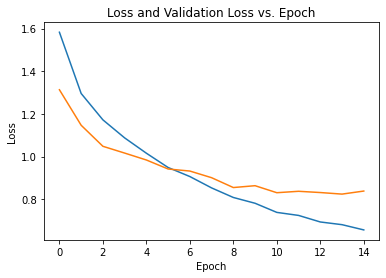

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

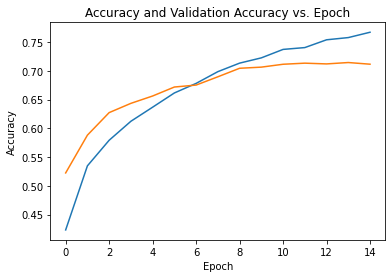

In [27]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(33.0, 0.5, 'True Label')

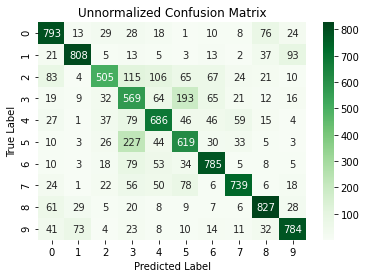

In [36]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='Greens')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

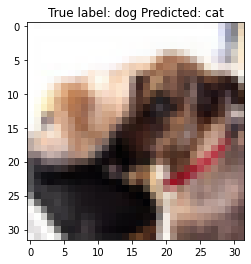

In [42]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]));